In [1]:
%matplotlib widget
import warnings
import inspect
import IPython.display
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from my_LP import quantise
from my_DWT import *
from cued_sf2_lab.jpeg import dwtgroup
from huffman import DWT_huffenc, DWT_huffdec
from common import *

In [2]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lighthouse = lighthouse -  128.0
bridge = bridge - 128.0
flamingo = flamingo - 128.0

In [3]:
N = 7
h1 = np.array([-1, 2, 6, 2, -1])/8
h2 = np.array([-1, 2, -1])/4
g1 = np.array([1, 2, 1])/2
g2 = np.array([-1, -2, 6, -2, -1])/4

qrise = 1
strength = 2

In [3]:
Yq, factors, step = DWT_quant(flamingo, N, h1, h2, g1, g2, qrise = qrise, strength=strength)

bits: 40697, step: 8.257354213751997
bits: 38684, step: 12.742645786248001
bits: 37844, step: 15.514708427503995
bits: 38561, step: 13.13063900895719
bits: 38407, step: 13.712149515404477
bits: 38508, step: 13.352756257604888
bits: 38504, step: 13.387718732110864
bits: 38476, step: 13.488639454875543
bits: 38503, step: 13.395104713762956
bits: 38491, step: 13.430831805739041
bits: 38500, step: 13.408751248578627
bits: 38498, step: 13.41718527092337
bits: 38502, step: 13.407239154150323
bits: 38498, step: 13.412212212536847
bits: 38500, step: 13.410073219176828
bits: 38500, step: 13.409412233877728
bits: 38500, step: 13.409159759959534
bits: 38500, step: 13.409003722496818
bits: 38500, step: 13.408907286041343
bits: 38500, step: 13.408847685034104
bits: 38500, step: 13.408810849585866
bits: 38500, step: 13.408788084026863
bits: 38500, step: 13.408774014137627
bits: 38500, step: 13.408765318467863
bits: 38500, step: 13.408759944248393
bits: 38500, step: 13.408756412031009
step: 13.408756

### In huffenc, dcbits must be less that 32!

In [4]:
Y = DWT(flamingo, N, h1, h2)
ratios = get_ratios(Y, N, g1, g2)
dwtstep = np.ones((3, N+1))*ratios*step
Yq, _ = quantdwt(Y, dwtstep, factors, qrise, strength)
vlc, header = DWT_huffenc(Yq, N, dcbits=12, opthuff=True)
print(np.sum(vlc[:, 1]))

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 38500
Bits for huffman table = 1424
38500


Generating huffcode and ehuf using custom tables
Decoding rows


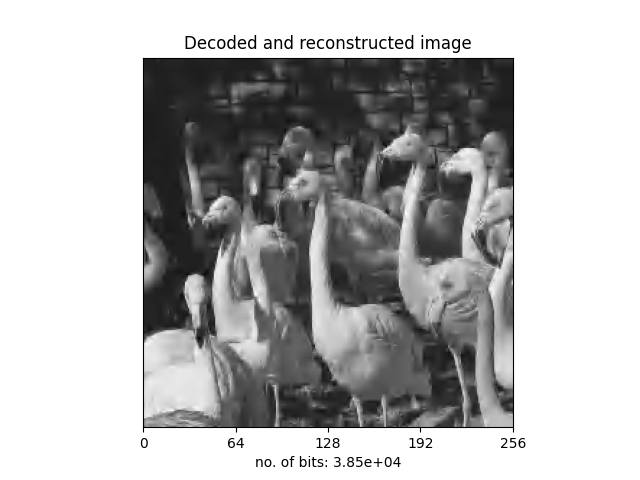

Error: 12.94


In [5]:

Z = DWT_huffdec(vlc, step, factors, qrise, strength, N, hufftab=header, dcbits=12)
reconstructed = inverse_DWT(Z, N, g1, g2)


fig, axs = plt.subplots()
plot_image(reconstructed, ax=axs)
size_of_img = np.sum(vlc[:, 1])
axs.set(title='Decoded and reconstructed image', yticks=[], xlabel=f'no. of bits: {size_of_img:.2e}')

print("Error:", np.std(reconstructed-flamingo).round(2))

In [4]:
vlc, header = DWT_huffenc(flamingo, N=7, dcbits=8, opthuff=True)
Z = DWT_huffdec(vlc, 10, factors, qrise, strength, N=7, hufftab=header)

-126
-125
-126
-126
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 528880
Bits for huffman table = 1424
Generating huffcode and ehuf using custom tables
Decoding rows


rms_ref: 8.859943275584582
step: 7.505050505050505
CR: 3.156853026493551
bits: 65686.78950304235
rms: 10.611766255909284
rms_ref: 4.803558992381568
step: 8.919191919191919
CR: 3.0885949557027943
bits: 77830.27239691107
rms: 9.969150810698693
rms_ref: 4.803558992381568
step: 12
CR: 4.069831521104063
bits: 59065.390171449166
rms: 11.782944559568902


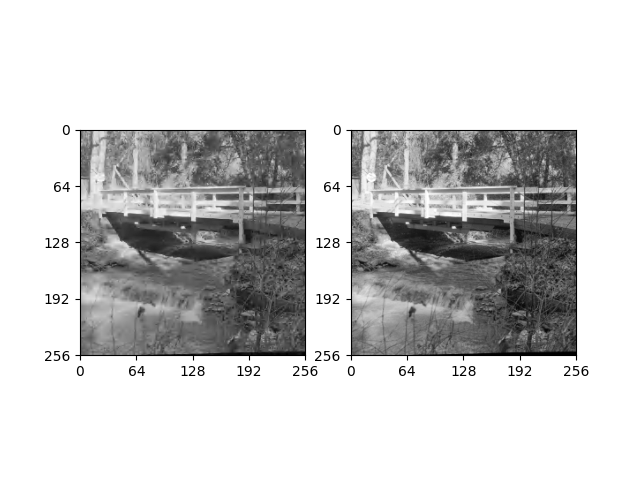

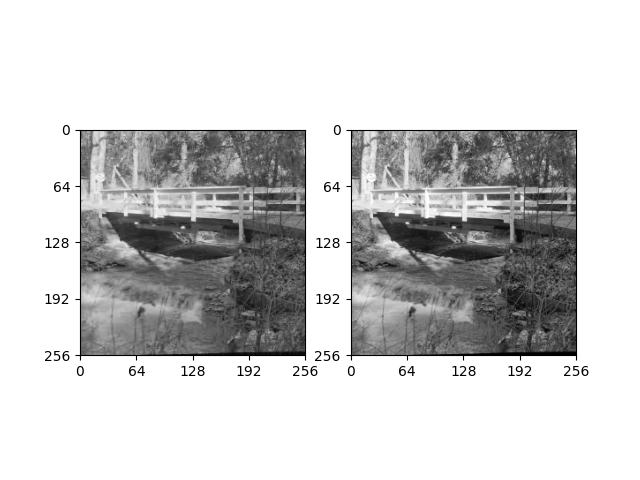

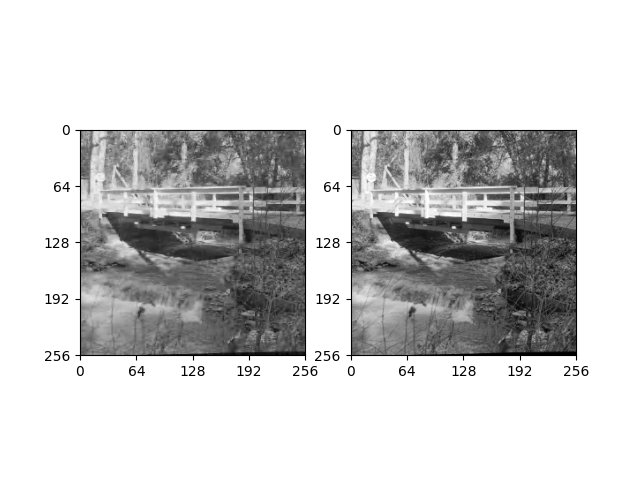

In [4]:
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, plot = True, qrise=1.5, strength=0)
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, plot = True, qrise=0.2, strength=0.5)
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, step = 12, plot = True, qrise=0.2, strength=0.5)

rms_ref: 4.992109372773084
step: 10.191919191919192
CR: 4.508024668248755
bits: 55023.7943557028
rms: 8.918225839678103


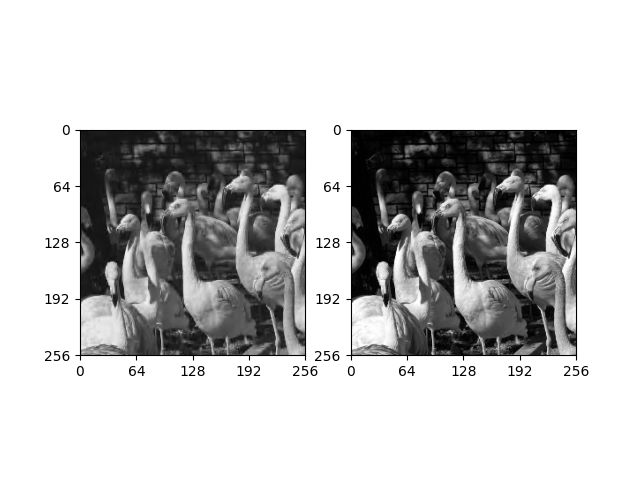

In [5]:
Zf = DWT_analysis(flamingo, 6, h1, h2, g1, g2, plot = True, qrise=0.2, strength=0.3)

In [9]:
from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen, runampl, diagscan)